# Εργασία 4 -Διαδικασία Moving Average για χρονοσειρά Ornstein–Uhlenbeck

### Εισαγωγή απαραίτητων βιβλιοθηκών

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv

### Η διαδικασία Ornstein–Uhlenbeck
ορίζεται από την παρακάτω στοχαστική διαφορική εξίσωση:

- dxt/dt = -axtdt + σ*Wdt


### Αρχικοποίηση του t και εισαγωγή 1000 τυχαίων τιμών τιμών από -1 έως 1 και τοποθέτηση τιμών μπροστά από το w


In [2]:
t1 = np.zeros(1000)
t2 = np.zeros(1000)
s1 = 2
s2 = 120

### Αρχικοποίηση του w1,w2,a και εισαγωγή 1000 τυχαίων τιμών τιμών από -1 έως 1  

In [3]:
w1 = np.zeros(1000)
w2 = np.zeros(1000)
a = np.zeros(1000)
for i in range(1000):
    w1[i] = round(random.uniform(-1.00,1.00),1)
    w2[i] = round(random.uniform(-1.00,1.00),1)
    a[i] = round(random.uniform(-1.00,1.00),1)

### Αποθήκευση των τιμών w1,w2 και a σε ένα αρχείο .csv

In [4]:
with open('OData.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['w1', 'w2', 'a'])
    for i in range(1000):
        writer.writerow([w1[i], w2[i], a[i]])

### Τοποθετώ την μεταβλητή για τον υπολογισμό του Moving Average

In [5]:
window_size = 3

### Εφαρμογή της εξίσωσης για τις w τιμές και με τιμή t και s1 = 30

- dxt/dt = -axtdt + σ*Wdt

### όπου το α παίρνει τυχαίες τιμές

In [6]:
t1[0] = 1
for i in range(1,1000):
    if i != 0 :
        t1[i] = -a[i]*t1[i-1] + s1*w1[i]

### Δημιουργία νέα χρονοσειράς με το Moving Average για σ = 30

In [7]:
smoothed_t1 = np.convolve(t1, np.ones(window_size) / window_size, mode='valid')

### Σχεδιάγραμμα των αποτελεσμάτων της εξίσωσης για σ = 30 και την αντίστοιχo Average τους

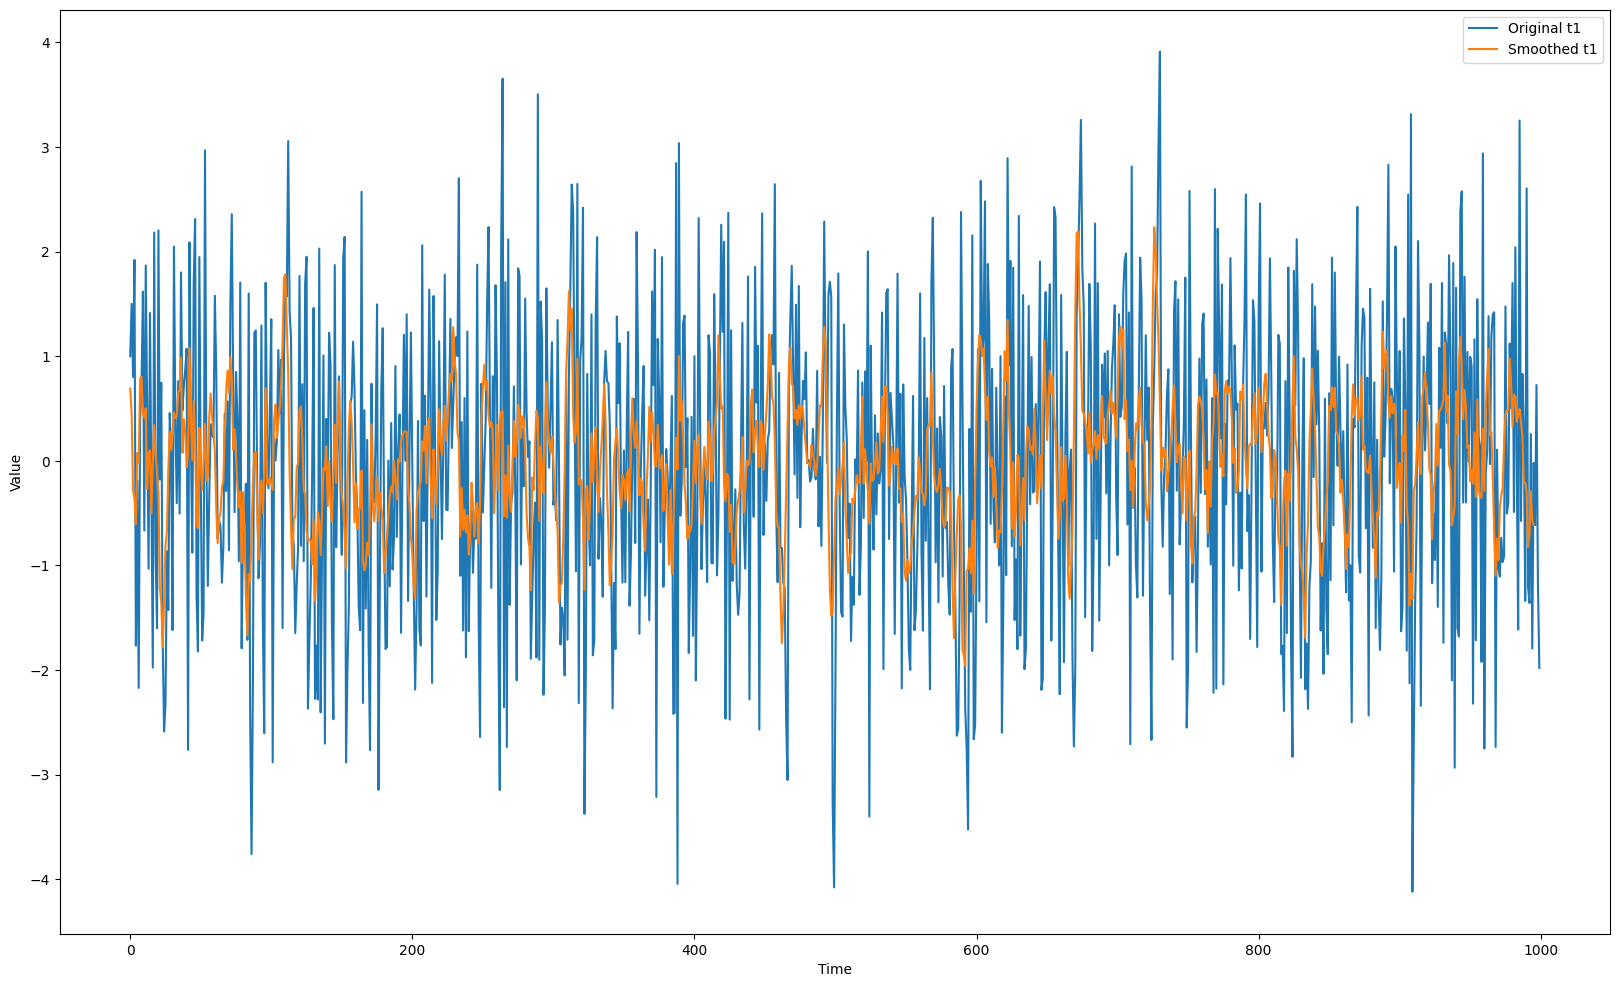

In [8]:
plt.figure(figsize=(20, 12))
plt.plot(t1, label='Original t1')
plt.plot(smoothed_t1, label='Smoothed t1')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

### Υπολογισμός της Διαφοράς των χρονοσειρών για σ = 30

In [9]:
diff1 = [t1[i] - t1[i-1] for i in range(1,len(t1))]

### Εφαρμογή της εξίσωσης για τις w τιμές και με τιμή t και s2 = 120

- dxt/dt = -axtdt + σ*Wdt

### όπου το α παίρνει τυχαίες τιμές

In [10]:
t2[0] = 1
for i in range(1,1000):
    if i != 0 :
        t2[i] = -a[i]*t2[i-1] + s2*w2[i]

### Δημιουργία νέα χρονοσειράς με το Moving Average για σ = 120

In [11]:
smoothed_t2 = np.convolve(t2, np.ones(window_size) / window_size, mode='valid')

### Σχεδιάγραμμα των αποτελεσμάτων της εξίσωσης για σ = 120 και την αντίστοιχo Average τους

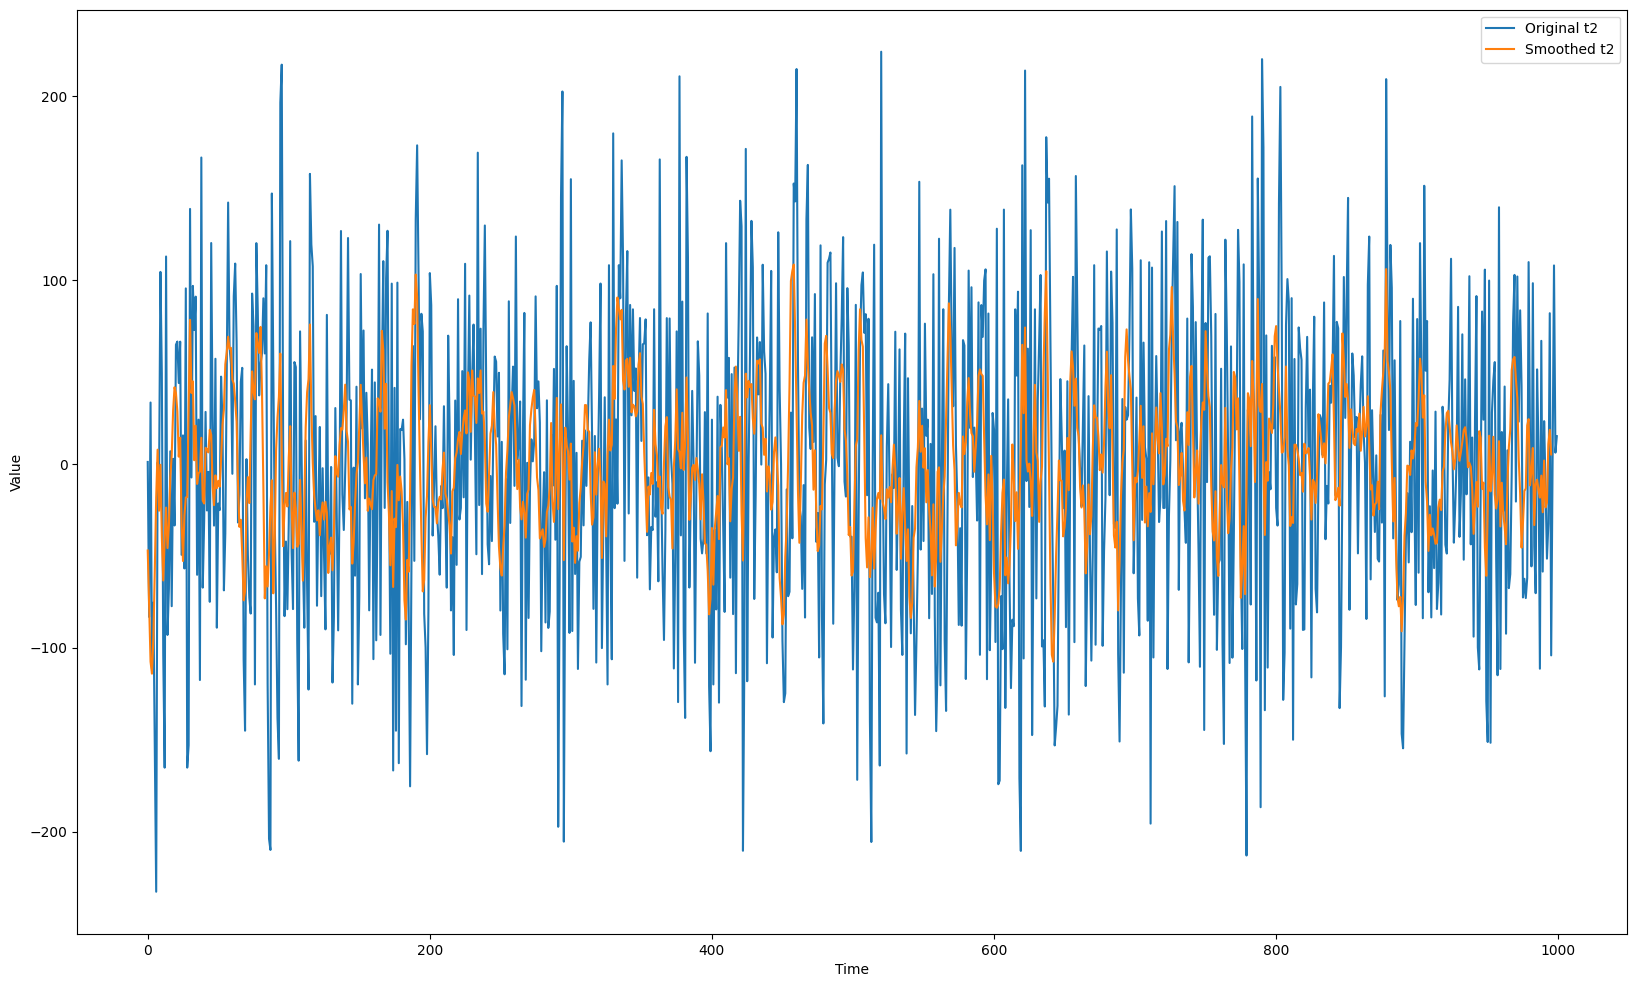

In [12]:
plt.figure(figsize=(20, 12))
plt.plot(t2, label='Original t2')
plt.plot(smoothed_t2, label='Smoothed t2')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

### Υπολογισμός της διαφοράς των χρονοσειρών για σ = 120

In [13]:
diff2 = [t2[i] - t2[i-1] for i in range(1,len(t2))]

### Δημιουργία νέων χρονοσειρέων με το Moving Average για τις διαφορές των σ = 30 και  σ = 120

In [14]:
smoothed_diff1 = np.convolve(diff1, np.ones(window_size) / window_size, mode='valid')
smoothed_diff2 = np.convolve(diff2, np.ones(window_size) / window_size, mode='valid')

### Σχεδιάγραμμα των αποτελεσμάτων της εξίσωσης για σ = 30 και σ = 120 μαζί με το αντίστοιχo Average τους

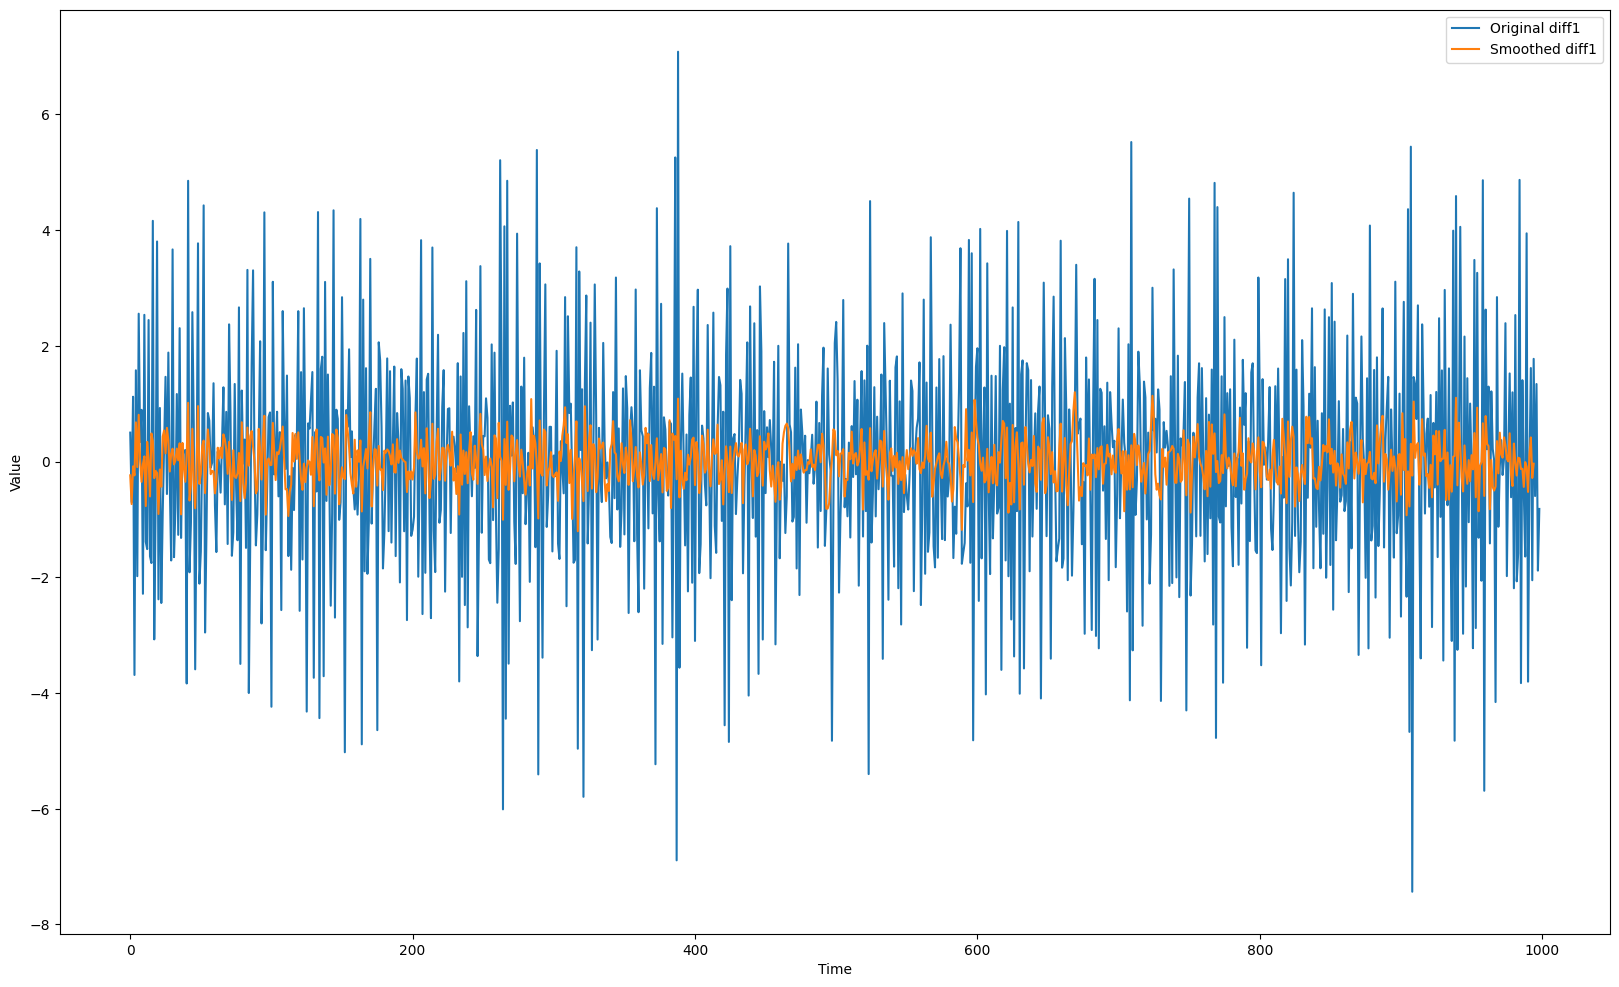

In [15]:
plt.figure(figsize=(20, 12))
plt.plot(diff1, label='Original diff1')
plt.plot(smoothed_diff1, label='Smoothed diff1')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

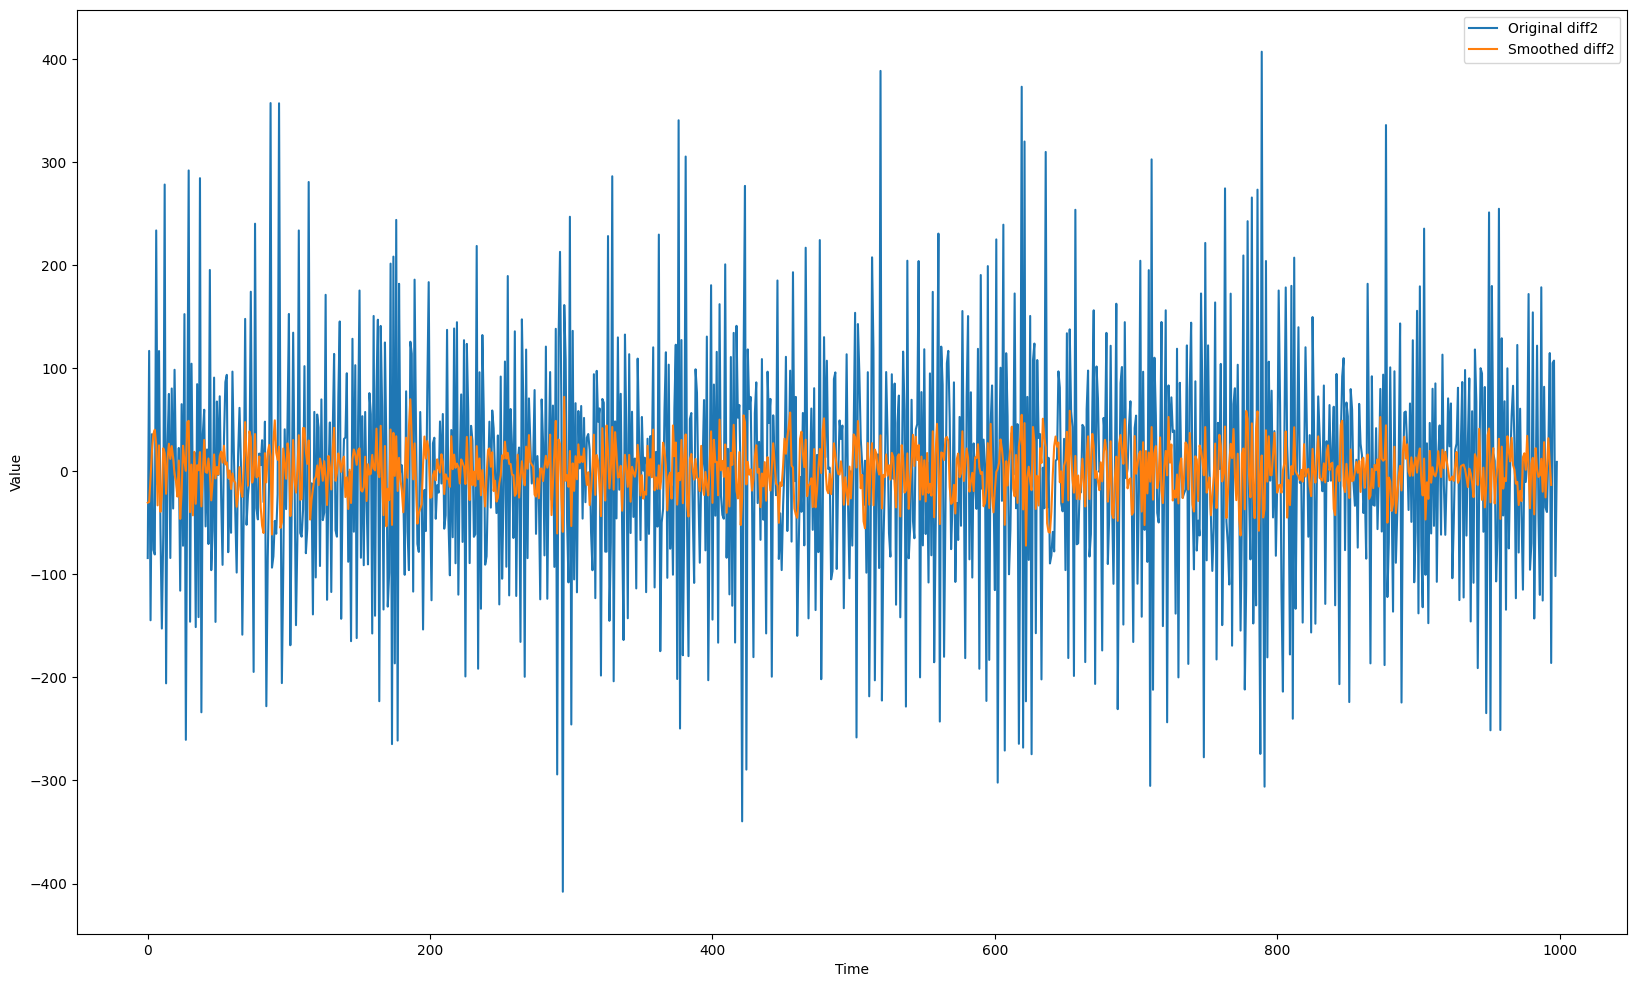

In [16]:
plt.figure(figsize=(20, 12))
plt.plot(diff2, label='Original diff2')
plt.plot(smoothed_diff2, label='Smoothed diff2')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()